In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
y = y['G3'].values
X = X[['studytime','absences']].values

In [6]:
# Step 2: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 3: Add the Bias Term to the Features Matrix
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias to the training set
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]     # Add bias to the testing set


In [8]:
# Step 4: Compute the Coefficients Using the Normal Equation
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)


In [9]:
# Extract the coefficients
intercept = theta_best[0]
coeff_study_time = theta_best[1]
coeff_absences = theta_best[2]

print(f'Intercept (theta_0): {intercept}')
print(f'Coefficient for study_time (theta_1): {coeff_study_time}')
print(f'Coefficient for absences (theta_2): {coeff_absences}')

Intercept (theta_0): 10.121741535294685
Coefficient for study_time (theta_1): 0.9663467663358671
Coefficient for absences (theta_2): -0.04486853611244539


In [10]:
# Step 5: Make Predictions on the Test Set
y_pred = X_test_b.dot(theta_best)

In [11]:
# Step 6: Evaluate the Model
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9.357258505668792
R-squared: 0.040450057366310244


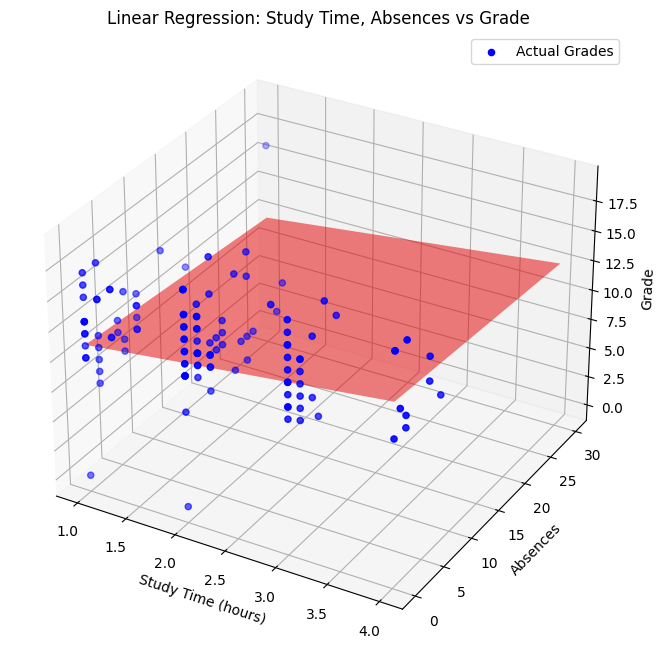

In [12]:
# Step 7: Visualization
# For visualization, we'll create a 3D scatter plot with the regression plane

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Grades')

# Predict a mesh grid for the plane
study_time_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 10)
absences_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 10)
study_time_grid, absences_grid = np.meshgrid(study_time_range, absences_range)
grade_pred_grid = (intercept + coeff_study_time * study_time_grid + coeff_absences * absences_grid)

# Plot the regression plane
ax.plot_surface(study_time_grid, absences_grid, grade_pred_grid, color='red', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('Study Time (hours)')
ax.set_ylabel('Absences')
ax.set_zlabel('Grade')
ax.set_title('Linear Regression: Study Time, Absences vs Grade')
ax.legend()

plt.show()